Importing the required libraries to get started.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


We take a look into our training set. This dataset features 28x28 pixel images of typeface digits from thousands of different fonts, which have been transformed into a csv file. The first column represents the label, which is going to be our target. The rest 784 columns each represent an individual pixel, and its value is ranging form 0 to 255, meaning the darkness of each one.

In [3]:
dfTrain = pd.read_csv('TMNIST_Data.csv')
dfTrain = dfTrain.iloc[:,1:]

dfTrain.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have to take the labels out of the training set, so SKLearn can handle them separately, named X and Y as usual.

In [4]:
y = dfTrain[dfTrain.columns[0]].values.flatten()
y

array([2, 8, 4, ..., 0, 1, 6])

Here we get the rest of the dataset without the labels.

In [5]:
x = dfTrain.drop(['labels'], axis = 1).values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

It is best practice that if you don't already have a separate training and test set to slice your original one into two, and use one only for training and the other one only for testing your trained model. If you are implementing this on your own dataset, be careful not to exclude any labels from the training set or test set (shuffle before splitting) as it will result in some headache.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(x,y,random_state=42)

We peek into how our data looks as images. This function takes random elements of the training set and renders them. Credit goes to https://www.kaggle.com/code/gainknowledge/mnist-scikit-learn-tutorial

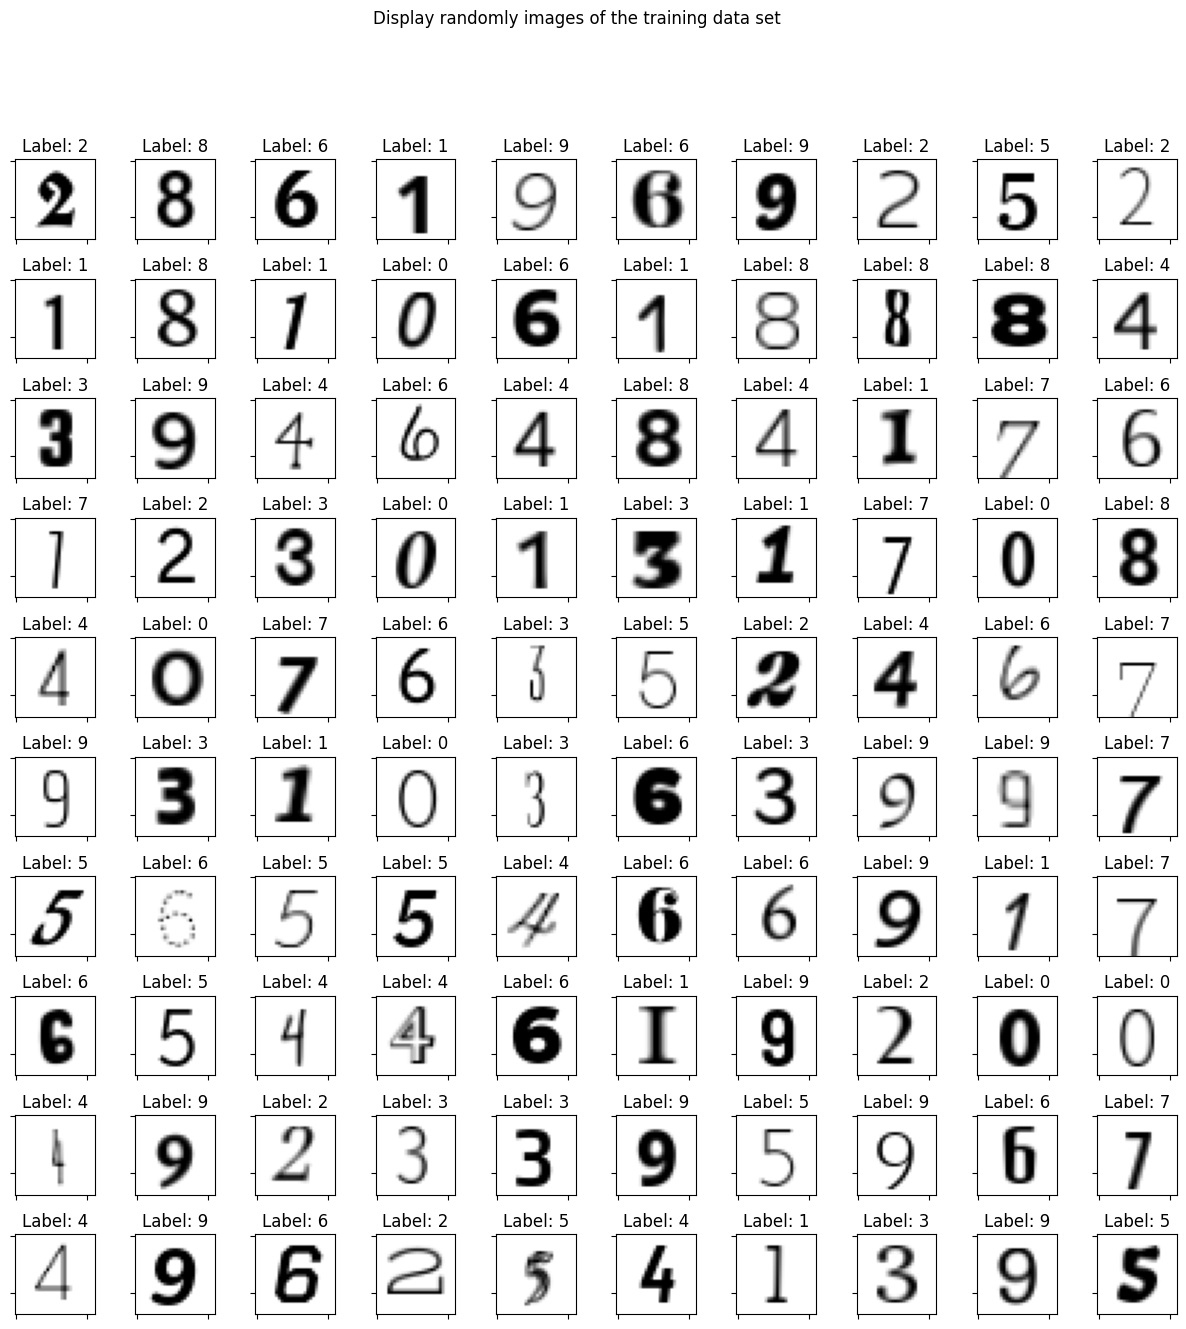

In [7]:
def displayData(X,Y):
    fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize = (15,15))
    fig.suptitle( "Display randomly images of the training data set")
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible = False)
            plt.setp(ax[i,j].get_yticklabels(), visible = False)
    fig.subplots_adjust(hspace=0.5, wspace= 0.5)
displayData(x_train, y_train)


Our neural net, which is a multi-layer perceptron this time. To prevent as much overfitting as possible, we are suing the Adam optimizer, as it's suited for smaller datasets, and also turn on early stopping to prevent further fitting, if the model is not learning meaningfully anymore.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(500,), alpha=0.2, early_stopping=True)
best_model = clf.fit(x/255.0, y)

Pickle is a Python library that lets us serialize trained models. for further use in our application.

In [9]:
import pickle

pickle.dump(best_model, open('typeface_model.pkl', 'wb'))

Creating two columns to keep track of predicted and original labels and then test our model's performance.

In [10]:
dfTrain['label_predicted'] = best_model.predict(x/255.0)
dfTrain['valid_predicted'] = dfTrain.apply(lambda row: row['label_predicted']==row['labels'], axis=1)
print('Training Accuracy: {:3.2f} %'.format(best_model.score(x,y)*100))
y_test_pred = best_model.predict(x)

Training Accuracy: 98.59 %


A Confusion matrix lets us see a better representation of our model's performance on testing data. Source is the same Kaggle article as linked above.

Text(0.5, 80.7222222222222, 'predicted label')

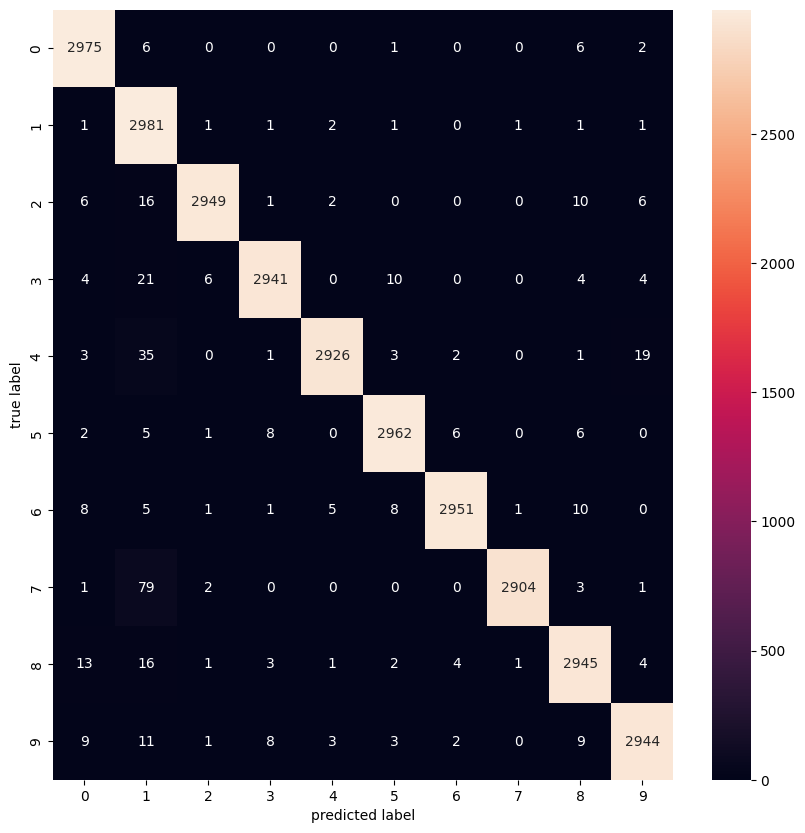

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

The model achieved very good results on its own test and training set, but this differs from real-world use-cases, so it doesn't necessarily mean it's going to predict users' handwritten digits as good as the typeface ones.